# Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load your dataset into a DataFrame
df = pd.read_csv("TampinesResaleFlat_with_LatLong_with_Features.csv")

# Data Inspection

In [2]:
df.shape

(13363, 22)

In [3]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price', 'Full Address', 'Latitude',
       'Longitude', 'nearest_bus_stop_distance', 'nearest_mrt_distance',
       'nearest_mall_distance', 'nearest_school_distance', 'bus_stop_count',
       'mrt_count', 'mall_count', 'school_count'],
      dtype='object')

In [4]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,...,Latitude,Longitude,nearest_bus_stop_distance,nearest_mrt_distance,nearest_mall_distance,nearest_school_distance,bus_stop_count,mrt_count,mall_count,school_count
0,2017-01,TAMPINES,2 ROOM,299A,TAMPINES ST 22,01 TO 03,45,Model A,2012,94 years 02 months,...,1.350005,103.953938,74.413446,NaN,NaN,308.671041,13.0,0.0,0.0,4.0
1,2017-01,TAMPINES,3 ROOM,403,TAMPINES ST 41,01 TO 03,60,Improved,1985,67 years 09 months,...,1.357512,103.944918,72.814515,457.922913,369.959209,465.132319,15.0,1.0,2.0,4.0
2,2017-01,TAMPINES,3 ROOM,802,TAMPINES AVE 4,04 TO 06,68,New Generation,1984,66 years 05 months,...,1.346084,103.938034,120.999263,NaN,NaN,203.682444,12.0,0.0,0.0,4.0
3,2017-01,TAMPINES,3 ROOM,410,TAMPINES ST 41,01 TO 03,69,Improved,1985,67 years 08 months,...,1.358778,103.946271,114.172862,NaN,526.408805,315.694223,12.0,0.0,1.0,4.0
4,2017-01,TAMPINES,3 ROOM,462,TAMPINES ST 44,07 TO 09,64,Simplified,1987,69 years 06 months,...,1.359013,103.955111,93.841568,NaN,NaN,229.786957,20.0,0.0,0.0,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13363 entries, 0 to 13362
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      13363 non-null  object 
 1   town                       13363 non-null  object 
 2   flat_type                  13363 non-null  object 
 3   block                      13363 non-null  object 
 4   street_name                13363 non-null  object 
 5   storey_range               13363 non-null  object 
 6   floor_area_sqm             13363 non-null  int64  
 7   flat_model                 13363 non-null  object 
 8   lease_commence_date        13363 non-null  int64  
 9   remaining_lease            13363 non-null  object 
 10  resale_price               13363 non-null  int64  
 11  Full Address               13363 non-null  object 
 12  Latitude                   13363 non-null  float64
 13  Longitude                  13363 non-null  flo

In [6]:
df.isnull().sum()

month                            0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
remaining_lease                  0
resale_price                     0
Full Address                     0
Latitude                         0
Longitude                        0
nearest_bus_stop_distance        4
nearest_mrt_distance          7363
nearest_mall_distance        10345
nearest_school_distance        400
bus_stop_count                   4
mrt_count                        4
mall_count                       4
school_count                     4
dtype: int64

# Data Cleaning and Preprocessing

In [7]:
# Replacing NaN values with 0 for the count variables (bus_stop_count, mrt_count, mall_count, school_count)
df['bus_stop_count'] = df['bus_stop_count'].fillna(0)
df['mrt_count'] = df['mrt_count'].fillna(0)
df['mall_count'] = df['mall_count'].fillna(0)
df['school_count'] = df['school_count'].fillna(0)

# Check for missing values again to ensure the counts are handled
df.isnull().sum()

# Set a random seed for reproducibility
np.random.seed(42)

# Drop rows where 'nearest_school_distance' is missing
df.dropna(subset=['nearest_school_distance'], inplace=True)

# Fill missing values for other columns with random sampling within the range 501-1000
columns_to_fill = ['nearest_mrt_distance', 'nearest_mall_distance', 'nearest_bus_stop_distance']

for column in columns_to_fill:
    if df[column].isnull().sum() > 0:  # Only fill if there are missing values
        df[column] = df[column].apply(lambda x: np.random.randint(501, 1001) if pd.isnull(x) else x)

# Check for missing values again
df.isnull().sum()

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

# Remove duplicates
df = df.drop_duplicates()

# Confirm that duplicates are removed
print(f"Number of duplicate rows after cleaning: {df.duplicated().sum()}")

#Split the month column into two separate columns: year and month
df['year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df['month'] = df['month'].apply(lambda x: int(x.split('-')[1]))

def convert_to_months(lease_str):
    # Check if the lease string includes a months portion
    if "months" in lease_str:
        # Expected format: "<years> years <months> months"
        years = int(lease_str.split(" years ")[0])
        months = int(lease_str.split(" years ")[1].split(" months")[0])
    else:
        # Format with only years: "<years> years"
        years = int(lease_str.split(" years")[0])
        months = 0
    return years * 12 + months

df['remaining_lease_months'] = df['remaining_lease'].apply(convert_to_months)
df.drop(columns=['remaining_lease'], inplace=True)

# Initialize the encoder with drop='first' to avoid the dummy variable trap
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Convert flat_type to integer (e.g., "3 ROOM" -> 3)
df['flat_type'] = df['flat_type'].str.extract('(\d+)').astype(float)

# Check if any missing values were introduced
print(f"Missing values in flat_type after conversion: {df['flat_type'].isnull().sum()}")

# Drop rows where flat_type is NaN (if any were introduced)
df.dropna(subset=['flat_type'], inplace=True)

# Convert to int after handling NaNs
df['flat_type'] = df['flat_type'].astype(int)

# Fit and transform the 'flat_type' column
encoded_features = encoder.fit_transform(df[['flat_type']])

# Create a dataframe with the encoded features using the built-in method for feature names
feature_names = encoder.get_feature_names_out(['flat_type'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original dataframe (excluding flat_type) with the encoded features
df = pd.concat([df.drop('flat_type', axis=1), encoded_df], axis=1)

# Check the result
print(df.head())

# Initialize the encoder with drop='first' to drop the first category (similar to drop_first=True)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'street_name' column
df['street_name'] = df['street_name'].astype('category').cat.codes + 1
encoded_features = encoder.fit_transform(df[['street_name']])

# Create a dataframe with the encoded features
# Get the feature names and remove the 'street_name_' prefix for cleaner column names if desired
feature_names = encoder.get_feature_names_out(['street_name'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original dataframe (excluding street_name) with the encoded features
df = pd.concat([df.drop('street_name', axis=1), encoded_df], axis=1)

# Check the result
print(df.head())

# Initialize the encoder with drop='first' to drop the first category (similar to drop_first=True)
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the 'flat_model' column
df['flat_model'] = df['flat_model'].astype('category').cat.codes + 1
encoded_features = encoder.fit_transform(df[['flat_model']])

# Create a dataframe with the encoded features
feature_names = encoder.get_feature_names_out(['flat_model'])
encoded_df = pd.DataFrame(encoded_features, columns=feature_names)

# Concatenate the original dataframe (excluding flat_model) with the encoded features
df = pd.concat([df.drop('flat_model', axis=1), encoded_df], axis=1)

# Check the result
print(df.head())

# Function to convert storey range to average floor level
def convert_storey_range(range_str):
    if isinstance(range_str, str):  # Ensure the value is a string before processing
        low, high = map(int, range_str.replace(' TO ', ' ').split())
        return (low + high) / 2
    return np.nan  # Return NaN if the value is not a string

# Convert storey_range to average floor level and create a new column 'storey_level'
df['storey_level'] = df['storey_range'].apply(convert_storey_range)

# Drop the 'storey_range' column as it's no longer needed
df.drop(columns=['storey_range'], inplace=True)

# Display the first few rows of the modified dataframe
df.head()

# Drop the original 'town' column
df.drop(columns=['town'], inplace=True, errors='ignore')

df.drop(columns=['block'], inplace=True, errors='ignore')

# Drop the original 'full address' column
df.drop(columns=['Full Address'], inplace=True, errors='ignore')

df.dropna(inplace=True) # failsafe method for SVR

# Check the result
print(df.head())

Missing Values:
 Series([], dtype: int64)

Number of duplicate rows: 3
Number of duplicate rows after cleaning: 0
Missing values in flat_type after conversion: 1406
   month      town block     street_name storey_range  floor_area_sqm  \
0    1.0  TAMPINES  299A  TAMPINES ST 22     01 TO 03            45.0   
1    1.0  TAMPINES   403  TAMPINES ST 41     01 TO 03            60.0   
2    1.0  TAMPINES   802  TAMPINES AVE 4     04 TO 06            68.0   
3    1.0  TAMPINES   410  TAMPINES ST 41     01 TO 03            69.0   
4    1.0  TAMPINES   462  TAMPINES ST 44     07 TO 09            64.0   

       flat_model  lease_commence_date  resale_price         Full Address  \
0         Model A               2012.0      250000.0  299A TAMPINES ST 22   
1        Improved               1985.0      270000.0   403 TAMPINES ST 41   
2  New Generation               1984.0      295000.0   802 TAMPINES AVE 4   
3        Improved               1985.0      300000.0   410 TAMPINES ST 41   
4      Simp

<>:63: SyntaxWarning: invalid escape sequence '\d'
<>:63: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jarre\AppData\Local\Temp\ipykernel_10220\3235683218.py:63: SyntaxWarning: invalid escape sequence '\d'
  df['flat_type'] = df['flat_type'].str.extract('(\d+)').astype(float)


   month      town block storey_range  floor_area_sqm      flat_model  \
0    1.0  TAMPINES  299A     01 TO 03            45.0         Model A   
1    1.0  TAMPINES   403     01 TO 03            60.0        Improved   
2    1.0  TAMPINES   802     04 TO 06            68.0  New Generation   
3    1.0  TAMPINES   410     01 TO 03            69.0        Improved   
4    1.0  TAMPINES   462     07 TO 09            64.0      Simplified   

   lease_commence_date  resale_price         Full Address  Latitude  ...  \
0               2012.0      250000.0  299A TAMPINES ST 22  1.350005  ...   
1               1985.0      270000.0   403 TAMPINES ST 41  1.357512  ...   
2               1984.0      295000.0   802 TAMPINES AVE 4  1.346084  ...   
3               1985.0      300000.0   410 TAMPINES ST 41  1.358778  ...   
4               1987.0      305000.0   462 TAMPINES ST 44  1.359013  ...   

   street_name_30  street_name_31  street_name_32  street_name_33  \
0             0.0             0.0  

# Feature Selection and Correlation Analysis

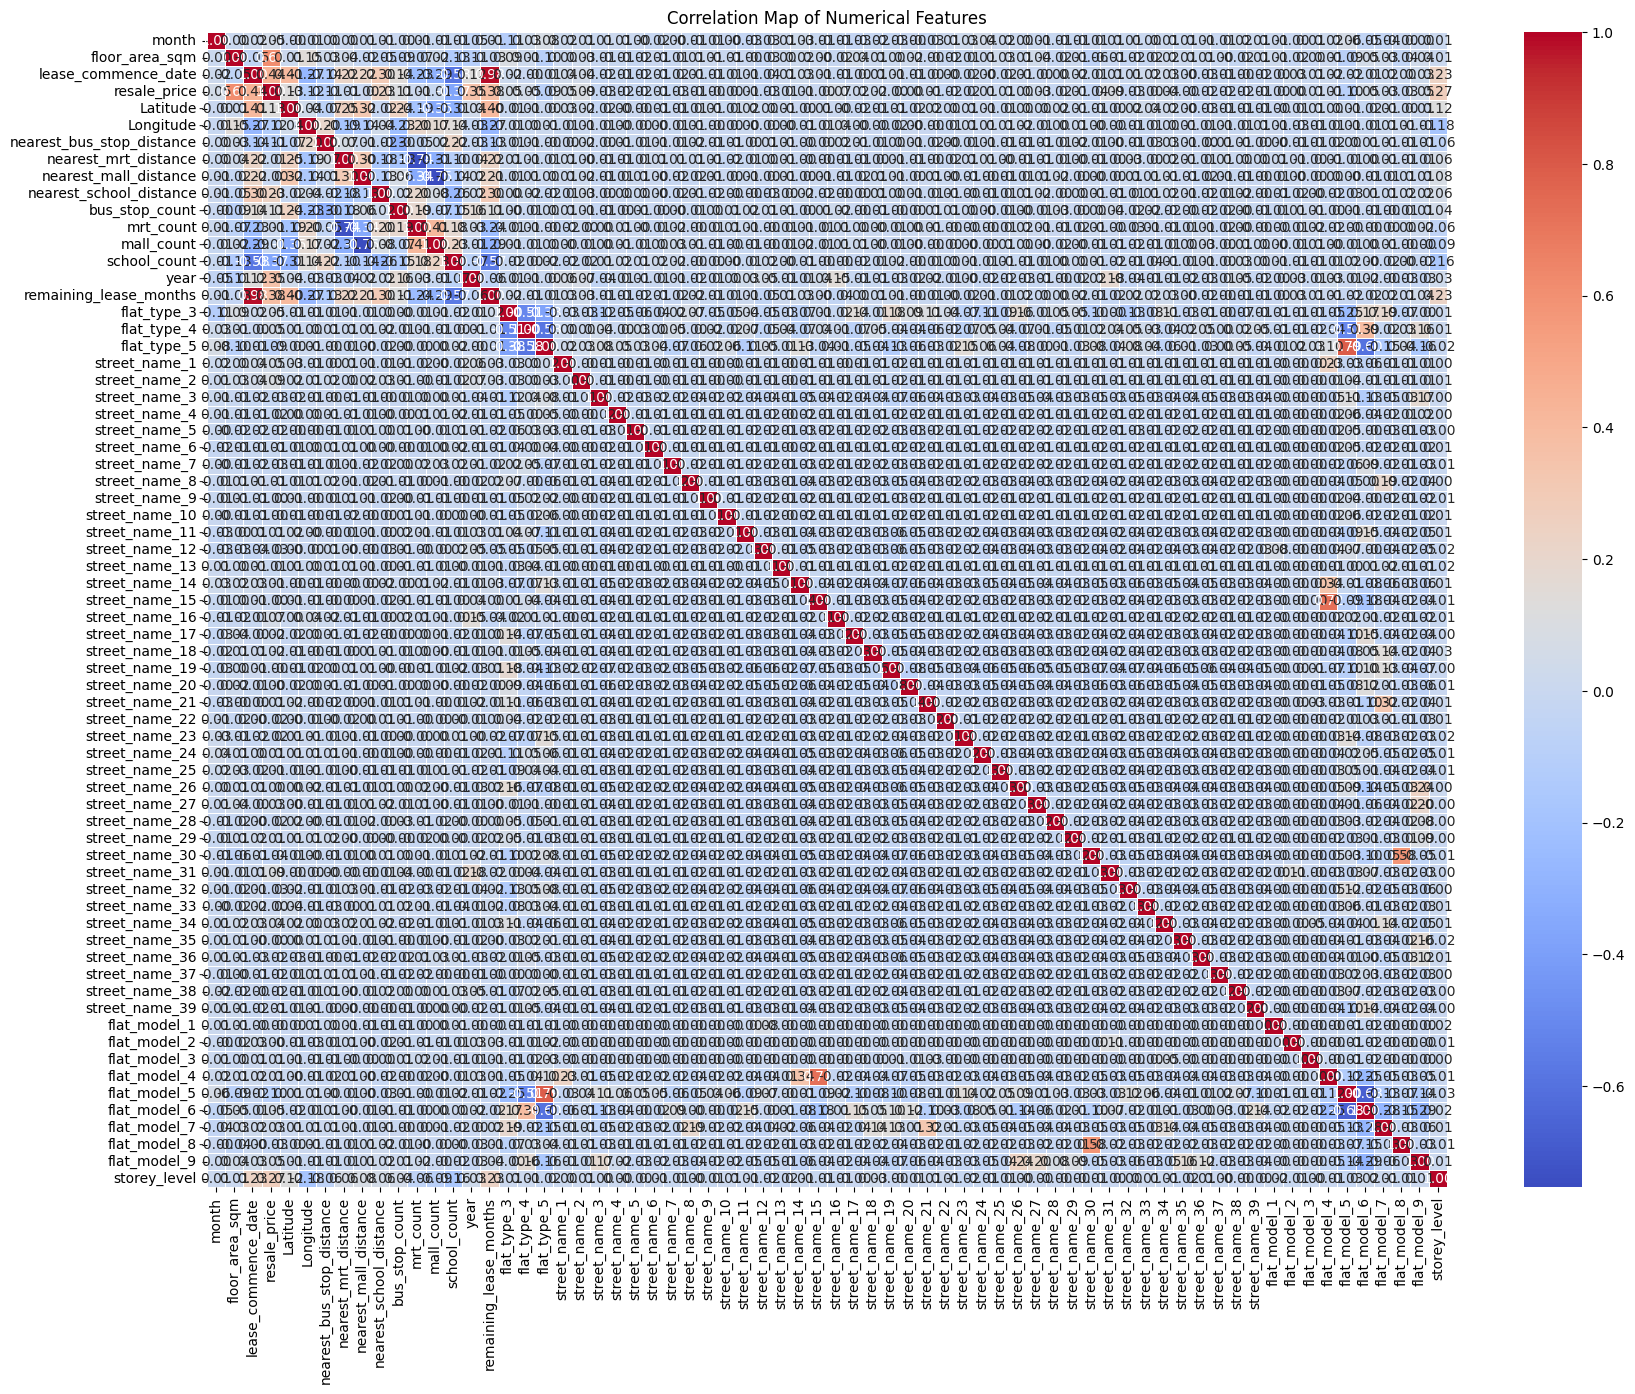

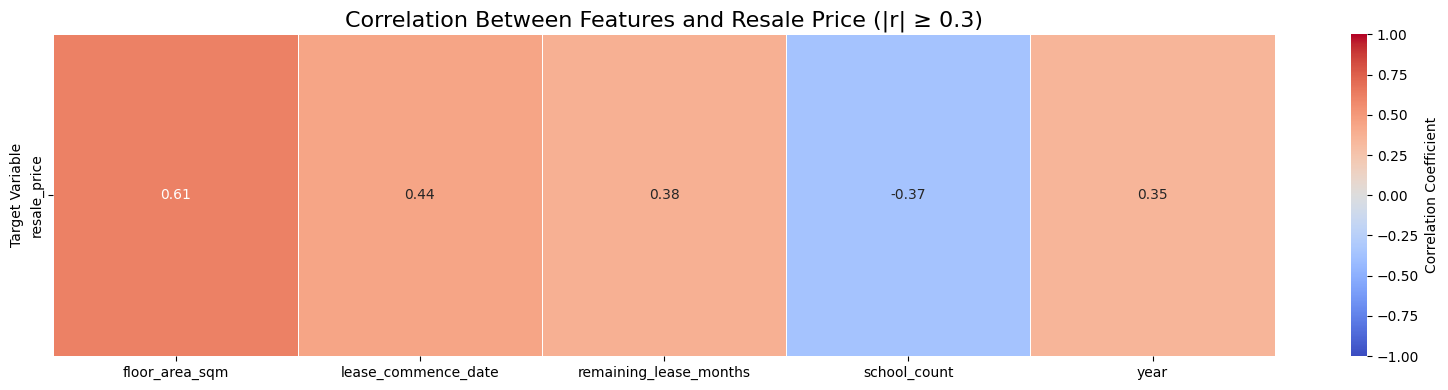

In [8]:
# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_features.corr()

# Plot the correlation map
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Map of Numerical Features')
plt.show()

# Select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlations with resale price
price_correlations = numerical_features.corr()['resale_price'].drop('resale_price')

# Define correlation threshold
threshold = 0.3  # You can adjust this value based on your needs

# Filter correlations based on threshold
significant_correlations = price_correlations[abs(price_correlations) >= threshold]

# Sort by absolute correlation value
sorted_correlations = significant_correlations.abs().sort_values(ascending=False)
sorted_features = sorted_correlations.index

# Create a DataFrame for the heatmap
heatmap_df = pd.DataFrame(price_correlations[sorted_features]).T

# Create the heatmap
plt.figure(figsize=(16, 4))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', fmt='.2f', 
            linewidths=0.5, vmin=-1, vmax=1, cbar_kws={'label': 'Correlation Coefficient'})

plt.title(f'Correlation Between Features and Resale Price (|r| ≥ {threshold})', fontsize=16)
plt.ylabel('Target Variable')
plt.tight_layout()
plt.show()

# Feature Scaling

In [9]:
# List of numerical features
numerical_features = ['month', 'floor_area_sqm', 'lease_commence_date', 'resale_price', 
                      'Latitude', 'Longitude', 'nearest_bus_stop_distance', 'nearest_mrt_distance', 
                      'nearest_mall_distance', 'nearest_school_distance', 'bus_stop_count', 
                      'mrt_count', 'mall_count', 'school_count', 'year', 'remaining_lease_months', 
                      'storey_level']

print(df[numerical_features].isnull().sum())

# List of categorical features (one-hot encoded)
categorical_features = [col for col in df.columns if col not in numerical_features]

# storing values before one hot encoding for reverse scaling usage
original_numerical_stats = {}
for col in numerical_features:
    original_numerical_stats[col] = {"mean": df[col].mean(), "std": df[col].std()}    

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Combine the scaled numerical features with the one-hot encoded categorical features
scaled_df = pd.concat([df[numerical_features], df[categorical_features]], axis=1)

# Display the first few rows of the scaled DataFrame
print(scaled_df.head())

month                        0
floor_area_sqm               0
lease_commence_date          0
resale_price                 0
Latitude                     0
Longitude                    0
nearest_bus_stop_distance    0
nearest_mrt_distance         0
nearest_mall_distance        0
nearest_school_distance      0
bus_stop_count               0
mrt_count                    0
mall_count                   0
school_count                 0
year                         0
remaining_lease_months       0
storey_level                 0
dtype: int64
      month  floor_area_sqm  lease_commence_date  resale_price  Latitude  \
0 -1.687901       -2.557020             1.827260     -2.035827 -0.651934   
1 -1.687901       -1.838405            -0.710132     -1.863537  0.790136   
2 -1.687901       -1.455144            -0.804110     -1.648175 -1.405196   
3 -1.687901       -1.407236            -0.710132     -1.605103  1.033372   
4 -1.687901       -1.646775            -0.522177     -1.562030  1.078615   

   

# Reverse Scaling

In [10]:
# Copy the original dataset to modify
reverse_df = df.copy()

# Reverse scaling for all numerical features using stored means/stds for xgboost
for col in numerical_features:
    reverse_df[col] = (reverse_df[col] * original_numerical_stats[col]["std"]) + original_numerical_stats[col]["mean"]

# Round and convert specific numerical values
reverse_df["month"] = reverse_df["month"].round().astype("Int64")
reverse_df["year"] = reverse_df["year"].round().astype("Int64")
reverse_df["storey_level"] = reverse_df["storey_level"].round().astype("Int64")
reverse_df["lease_commence_date"] = reverse_df["lease_commence_date"].round().astype("Int64")

# Identify original categorical columns before one-hot encoding
reverse_categorical_columns = ["flat_type", "storey_level", "flat_model", "street_name"]

# Reconstruct categorical columns from one-hot encoded data
for col in reverse_categorical_columns:
    one_hot_cols = [c for c in reverse_df.columns if c.startswith(f"{col}_")]
    if one_hot_cols:
        reverse_df[col] = reverse_df[one_hot_cols].idxmax(axis=1).str[len(col) + 1:]
        reverse_df.drop(columns=one_hot_cols, inplace=True)

# Sort dataset by year first, then by month
reverse_df.sort_values(by=["year", "month"], ascending=[True, True], inplace=True)

# Now define the training (≤2022) and testing (≥2023) sets
train_df = reverse_df[reverse_df['year'] <= 2022].copy()
test_df = reverse_df[reverse_df['year'] >= 2023].copy()

# Define features and target variable
X_train = train_df.drop(columns=["resale_price"])
y_train = train_df["resale_price"]
X_test = test_df.drop(columns=["resale_price"])
y_test = test_df["resale_price"]

df = df.apply(pd.to_numeric, errors='coerce')
X_train = X_train.apply(pd.to_numeric, errors='coerce')
y_train = y_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
y_test = y_test.apply(pd.to_numeric, errors='coerce')

# Multiple Linear Regression

In [11]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Metrics:")
print(f"Mean Absolute Error: {mae_linear}")
print(f"Mean Squared Error: {mse_linear}")
print(f"R-squared: {r2_linear}")

Linear Regression Metrics:
Mean Absolute Error: 54725.74633536399
Mean Squared Error: 4642568457.89604
R-squared: 0.6626006961027944


# Lasso Regression

In [12]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nLasso Regression Metrics:")
print(f"Mean Absolute Error: {mae_lasso}")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}")


Lasso Regression Metrics:
Mean Absolute Error: 54670.78778265326
Mean Squared Error: 4640013289.437184
R-squared: 0.662786393323455


c:\Users\jarre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.699e+12, tolerance: 9.971e+09
  model = cd_fast.enet_coordinate_descent(


# Ridge Regression

In [13]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Metrics:")
print(f"Mean Absolute Error: {mae_ridge}")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}")


Ridge Regression Metrics:
Mean Absolute Error: 53462.73115206612
Mean Squared Error: 4479518440.988969
R-squared: 0.6744503786015646


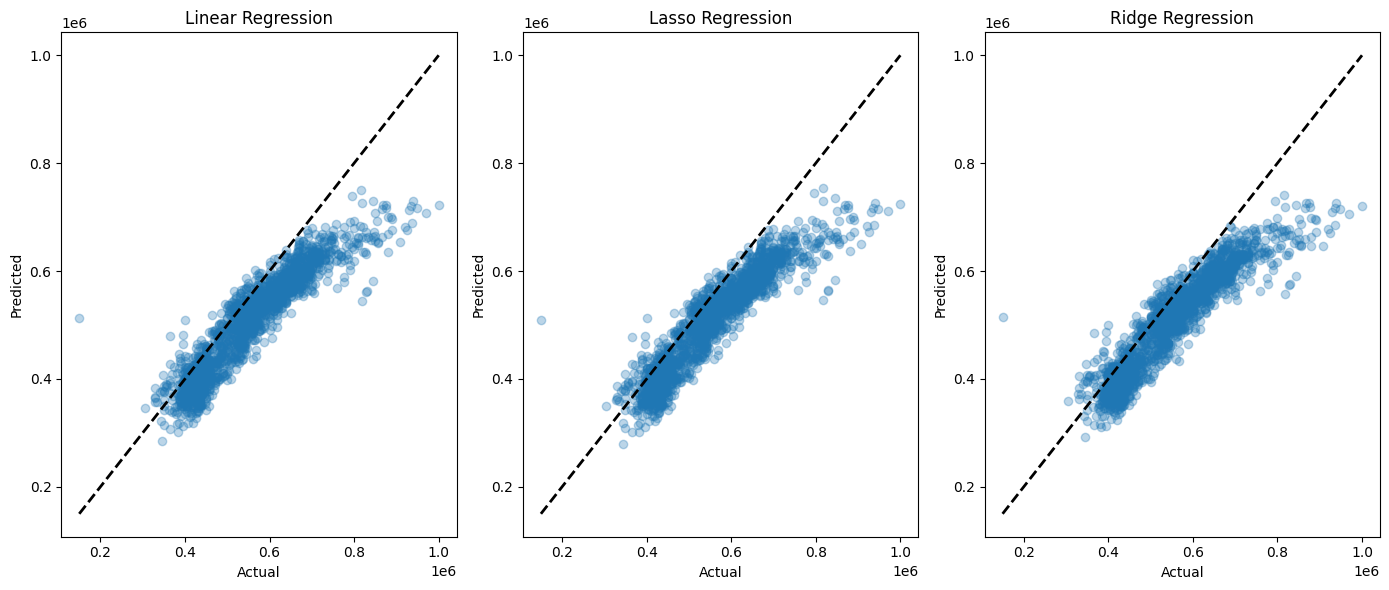

In [14]:
# Plotting the results
plt.figure(figsize=(14, 6))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

# Lasso Regression
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

# Ridge Regression
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_ridge, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression')

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

# Lasso Regression with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

print("Best alpha for Lasso:", lasso_grid.best_params_)

# Ridge Regression with GridSearchCV
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

print("Best alpha for Ridge:", ridge_grid.best_params_)

c:\Users\jarre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.909e+12, tolerance: 8.364e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\jarre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.006e+12, tolerance: 8.200e+09
  model = cd_fast.enet_coordinate_descent(
c:\Users\jarre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

Best alpha for Lasso: {'alpha': 10}
Best alpha for Ridge: {'alpha': 0.1}


# Ridge Regression 

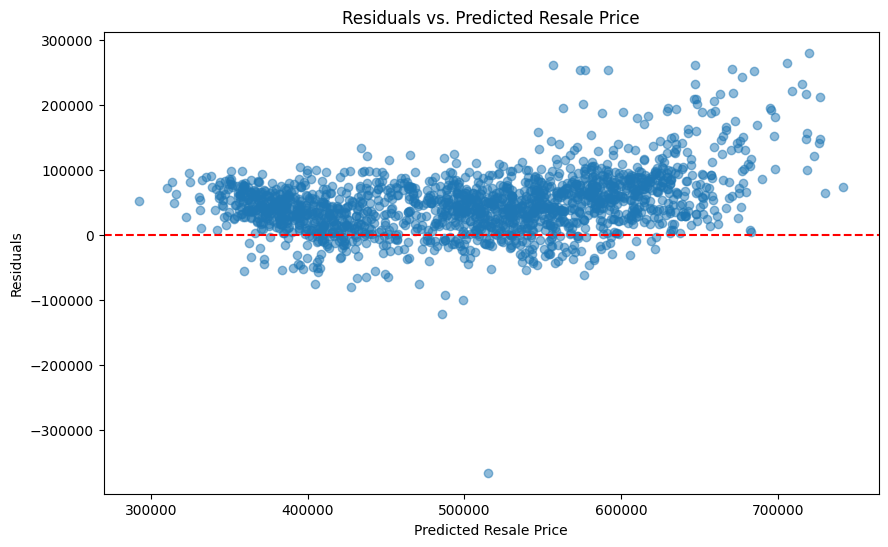

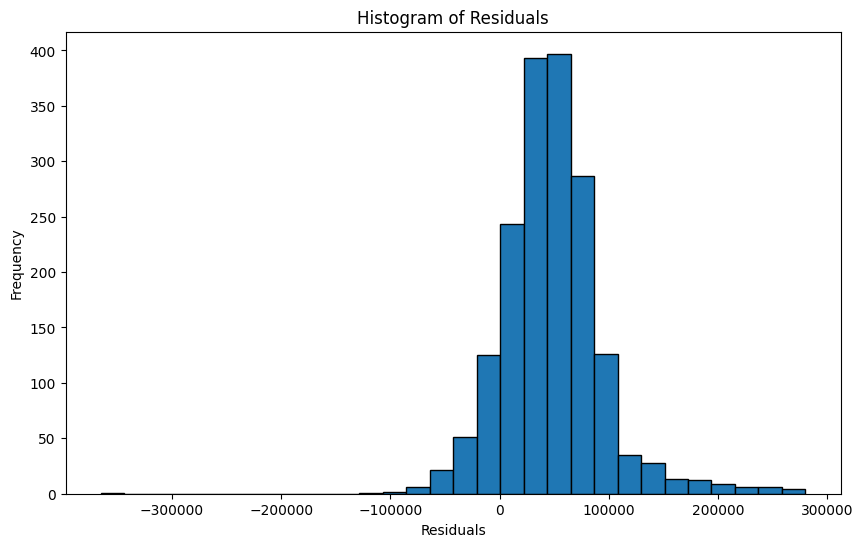

In [19]:
# Calculate residuals
residuals = y_test - y_pred_ridge

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Resale Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Resale Price')
plt.show()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()